<a href="https://colab.research.google.com/github/1kaiser/Jodhpur_ecostress_LST/blob/main/GRACE_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prerequisite

In [ ]:
!wget https://github.com/1kaiser/Jodhpur_ecostress_LST/releases/download/1/folder.zip
!unzip -o /content/folder.zip -d /content/files

In [ ]:
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/DEM.tif
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/SLOPE.tif
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/ASPECT.tif

In [ ]:
!pip install rasterio

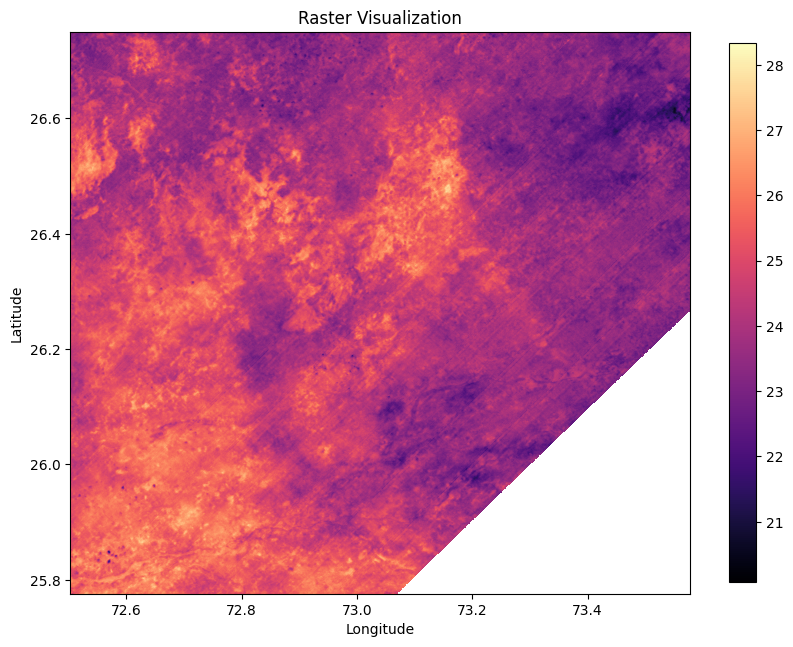

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIFF file
tif_path = "/content/files/content/testfiles/ECO2LSTE.001_SDS_LST_doy2018255023709_aid0001.tif"
dataset = rasterio.open(tif_path)

# Read the raster data
raster_data = dataset.read(1, masked = True) * 0.02 - 273.15

# Get the spatial extent
xmin, ymin, xmax, ymax = dataset.bounds

# Plot the raster using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='magma', extent=[xmin, xmax, ymin, ymax])

# Add a colorbar
plt.colorbar(shrink=0.7)

# Set the axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set the title
plt.title('Raster Visualization')

# Display the plot
plt.show()

# Close the dataset
dataset.close()


# part 2

In [ ]:
image_dir = r'/content/files/content/testfiles'

#############################################################################
prefix = "ECO2LSTE.001_SDS_"
bandend = ["LST", "PWV", "b03", "b04", "b05", "b06", "b07", "day_of_year", "qc_500m", "raz", "state_500m", "szen", "vzen"]
DayOY = "_doy\[0-9]+_aid0001"
fileExt = r'.tif'
expression_b1 = prefix+bandend[0]
expression_b2 = prefix+bandend[1]

temp_dir = r'/content/'
import os

imgs_list_b1 = [f for f in os.listdir(image_dir) if f.__contains__(expression_b1)]

imgs_list_b1.sort(reverse=True)

                    #<<<< to start file streaming from the last date 2022 >> 2021 >> 2020 ....

imgs_path_b1 = [os.path.join(image_dir, i) for i in imgs_list_b1 if i != 'outputs']
print(len(imgs_path_b1))

586


In [ ]:
tif_path = "/content/files/content/testfiles/ECO2LSTE.001_SDS_LST_doy2018255023709_aid0001.tif"
year = os.path.splitext(os.path.basename(tif_path))[0].split('_')[-2][3:7]
doy = os.path.splitext(os.path.basename(tif_path))[0].split('_')[-2][7:10]
print(year,doy)

2018 255


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import os

def view_tiff_file(tif_path):
    # Open the TIFF file
    dataset = rasterio.open(tif_path)

    # Read the raster data
    raster_data = dataset.read(1, masked=True) * 0.02 - 273.15

    # Get the spatial extent
    dataset1 = rasterio.open("/content/files/content/testfiles/ECO2LSTE.001_SDS_LST_doy2018255023709_aid0001.tif")
    xmin, ymin, xmax, ymax = dataset1.bounds

    # Extract day of year from the file name
    year = os.path.splitext(os.path.basename(tif_path))[0].split('_')[-2][3:7]
    doy = os.path.splitext(os.path.basename(tif_path))[0].split('_')[-2][7:10]

    # Plot the raster using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(raster_data, cmap='magma', extent=[xmin, xmax, ymin, ymax])
    plt.colorbar(shrink=0.7)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Day of Year: {year} - {doy}')

    # Set the output path based on the doy
    output_path = f"/content/{year}{doy}.png"

    # Save the plot as PNG
    plt.savefig(output_path, dpi=300)

    # Close the dataset
    dataset.close()
    plt.close()

# Example usage
tif_path = "/content/files/content/testfiles/ECO2LSTE.001_SDS_LST_doy2018255023709_aid0001.tif"
view_tiff_file(tif_path)


In [ ]:
for file_name in imgs_list_b1:
    file_name = '/content/files/content/testfiles/' + file_name
    view_tiff_file(file_name)

In [ ]:
#####################################create video 1
!ffmpeg \
-framerate 10 \
-pattern_type glob \
-i '/content/*.png' \
/content/files/input0.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

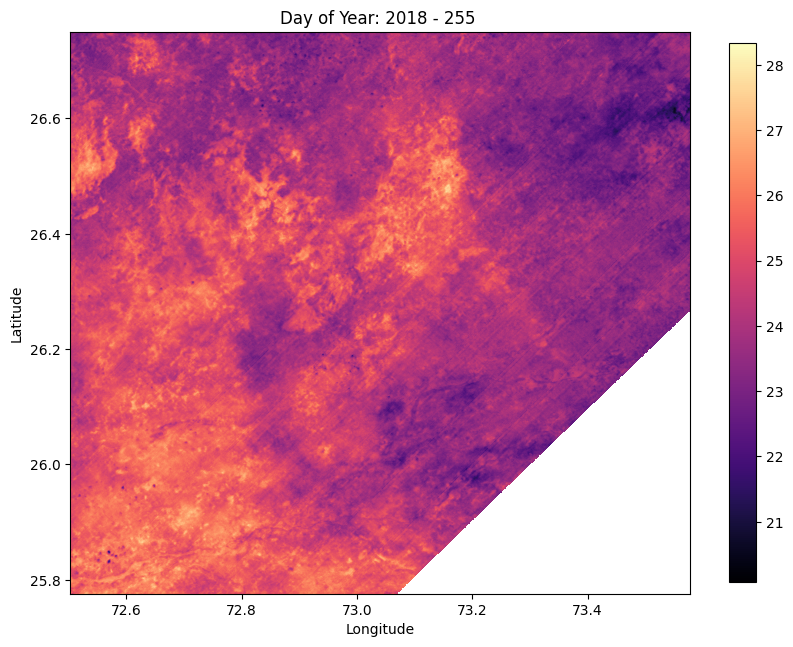

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import os

def view_tiff_file(tif_path):
    # Open the TIFF file
    dataset = rasterio.open(tif_path)

    # Read the raster data
    raster_data = dataset.read(1, masked=True) * 0.02 - 273.15

    # Get the spatial extent
    xmin, ymin, xmax, ymax = dataset.bounds

    # Extract day of year from the file name
    year = os.path.splitext(os.path.basename(tif_path))[0].split('_')[-2][3:7]
    doy = os.path.splitext(os.path.basename(tif_path))[0].split('_')[-2][7:10]
    # print(year,doy)

    # Plot the raster using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(raster_data, cmap='magma', extent=[xmin, xmax, ymin, ymax])

    # Add a colorbar
    plt.colorbar(shrink=0.7)

    # Set the axis labels
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Set the title
    plt.title(f'Day of Year: {year} - {doy} ')

    # Set the output path based on the doy
    output_path = f"/content/{year}{doy}.png"

    # Save the plot as PNG
    plt.savefig(output_path, dpi=300)

    # # Display the plot
    plt.show()

    # Close the dataset
    dataset.close()

# Example usage
tif_path = "/content/files/content/testfiles/ECO2LSTE.001_SDS_LST_doy2018255023709_aid0001.tif"
view_tiff_file(tif_path)


In [ ]:
from osgeo import gdal, osr

def transform_and_reshape_raster(raster_file, dem_file, output_file):
    # Open the DEM file
    dem_dataset = gdal.Open(dem_file, gdal.GA_ReadOnly)
    if dem_dataset is None:
        print("Failed to open the DEM file.")
        return

    # Get the DEM projection and geotransform information
    dem_projection = dem_dataset.GetProjection()
    dem_geotransform = dem_dataset.GetGeoTransform()

    # Open the raster file
    raster_dataset = gdal.Open(raster_file, gdal.GA_ReadOnly)
    if raster_dataset is None:
        print("Failed to open the raster file.")
        return

    # Get the raster projection and geotransform information
    raster_projection = raster_dataset.GetProjection()
    raster_geotransform = raster_dataset.GetGeoTransform()

    # Create a new dataset for the output file
    driver = gdal.GetDriverByName('GTiff')
    output_dataset = driver.Create(output_file, dem_dataset.RasterXSize, dem_dataset.RasterYSize, 1, gdal.GDT_Float32)

    # Set the output dataset's projection and geotransform
    output_dataset.SetProjection(dem_projection)
    output_dataset.SetGeoTransform(dem_geotransform)

    # Reproject and reshape the raster
    gdal.ReprojectImage(raster_dataset, output_dataset, raster_projection, dem_projection, gdal.GRA_NearestNeighbour)

    # Close the datasets
    dem_dataset = None
    raster_dataset = None
    output_dataset = None

    print("Raster transformation and reshaping completed.")

import rasterio
import matplotlib.pyplot as plt

def plot_dem_raster(file_path):
    # Open the DEM raster file
    dem_in = rasterio.open(file_path)
    dem_data = dem_in.read(1, masked=True) * 0.02 - 273.15
    left, bottom, right, top = dem_in.bounds
    fig, ax = plt.subplots()

    # Show the raster on the plot
    im = ax.imshow(dem_data , extent=[left, right, bottom, top])

    # Add a legend
    cbar = plt.colorbar(im, ax=ax, shrink=0.5)

    # Set the label for the legend
    cbar.ax.set_ylabel('Legend label', rotation=270, labelpad=15)

    # Show the plot
    plt.show()

import rasterio
import numpy as np
import numpy.ma as ma

def calculate_raster_statistics(file_path):
    # Open the raster file
    src = rasterio.open(file_path)
    data = src.read(1, masked=True) * 0.02 - 273.15

    # Calculate the statistics of the data
    # min_val = np.min(data)
    # max_val = np.max(data)
    mean_val = np.mean(data)
    # median_val = ma.median(data)  # Use numpy.ma.median() for masked arrays
    # std_val = np.std(data)

    # Calculate the number of pixels
    num_pixels = np.sum(~data.mask)

    # Get the pixel size
    x_resolution = src.res[0]
    y_resolution = src.res[1]

    return [ mean_val, num_pixels * x_resolution * y_resolution / 1000000 ]

def extract_doy_year(fname):
    year_start_index = fname.find('doy') + 3
    year_end_index = year_start_index + 4
    doy_start_index = year_end_index
    doy_end_index = doy_start_index + 3

    year = int(fname[year_start_index:year_end_index])
    doy = int(fname[doy_start_index:doy_end_index])

    return doy, year

pathb1 = imgs_list_b1[10]
pathb2 = pathb1.replace(expression_b1, expression_b2)
temp_dir = f'/content/'

file_outputs = []  # List to store outputs for each file

# Loop through each file
for file_name in imgs_list_b1:
    file_name = '/content/files/' + file_name
    # Run the function 7 times for the current file
    outputs = []
    transform_and_reshape_raster(file_name, str(temp_dir)+'DEM.tif', str(temp_dir)+'output_reprojected.tif')

    E_difference = 500
    last_num = int(7000/E_difference)
    for i in range(1, last_num + 1):
        !gdal_calc.py \
            --overwrite \
            --type=Float32 \
            -A {temp_dir}DEM.tif \
            --A_band 1 \
            -B {temp_dir}output_reprojected.tif \
            --B_band 1 \
            --outfile=SmallerFileB"{str(i)}".tif \
            --NoDataValue=0 \
            --calc="((A.astype(float)>{E_difference*(i-1)})*(A.astype(float)<={E_difference*i})*1)*(B.astype(float))"
        print()
        # plot_dem_raster('SmallerFileB'+str(i)+'.tif')
        output = calculate_raster_statistics('SmallerFileB'+str(i)+'.tif')
        outputs.append(output)

    # doy, year = extract_doy_year(file_name)
    # Add the file name and outputs to the file_outputs list
    file_outputs.append([file_name, outputs])

    from google.colab import output
    output.clear()

    # Save the file outputs as a text file
    output_file = "file_outputs.txt"  # Specify the file name or path as needed
    with open(output_file, 'w') as f:
        for file_output in file_outputs:
            file_name = file_output[0]
            outputs = file_output[1]

            f.write(f"{file_name},")
            f.write(", ".join(str(output) for output in outputs) + "\n")





In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the DEM raster file
dem_in = rasterio.open('/content/DEM.tif')
dem_data = dem_in.read(1, masked=True)

# Set the range values to select
min_range = 2000
max_range = 3000

# Apply the range condition to the DEM data
dem_data_range = np.where((dem_data >= min_range) & (dem_data <= max_range), dem_data, np.nan)

# Open the raster file
src = rasterio.open(imgs_path_b1[4])
data = src.read(1, masked=True)

left, bottom, right, top = src.bounds

# Calculate the statistics of the data
min_val = np.min(data)
max_val = np.max(data)
mean_val = np.mean(data)
std_val = np.std(data)

# Create a plot
fig, ax = plt.subplots()

# Show the raster on the plot
ax.imshow(dem_data_range, extent=[left, right, bottom, top])
# im = ax.imshow(data, extent=[left, right, bottom, top])

# Add a legend
cbar = plt.colorbar(im, ax=ax, shrink=0.5)

# Set the label for the legend
cbar.ax.set_ylabel('Legend label', rotation=270, labelpad=15)

# Show the plot
plt.show()

# Print the statistics
print("Minimum:", min_val)
print("Maximum:", max_val)
print("Mean:", mean_val)
print("Standard Deviation:", std_val)


# part 2 parallel execution

In [ ]:
image_dir = r'/content/files'

#############################################################################
prefix = "ECO2LSTE.001_SDS_"
bandend = ["LST", "PWV", "b03", "b04", "b05", "b06", "b07", "day_of_year", "qc_500m", "raz", "state_500m", "szen", "vzen"]
DayOY = "_doy\[0-9]+_aid0001"
fileExt = r'.tif'
expression_b1 = prefix+bandend[0]
expression_b2 = prefix+bandend[1]

temp_dir = r'/content/'
import os

imgs_list_b1 = [f for f in os.listdir(image_dir) if f.__contains__(expression_b1)]

imgs_list_b1.sort(reverse=True)

                    #<<<< to start file streaming from the last date 2022 >> 2021 >> 2020 ....

imgs_path_b1 = [os.path.join(image_dir, i) for i in imgs_list_b1 if i != 'outputs']
print(len(imgs_path_b1))

from osgeo import gdal, osr

def transform_and_reshape_raster(raster_file, dem_file, output_file):
    # Open the DEM file
    dem_dataset = gdal.Open(dem_file, gdal.GA_ReadOnly)
    if dem_dataset is None:
        print("Failed to open the DEM file.")
        return

    # Get the DEM projection and geotransform information
    dem_projection = dem_dataset.GetProjection()
    dem_geotransform = dem_dataset.GetGeoTransform()

    # Open the raster file
    raster_dataset = gdal.Open(raster_file, gdal.GA_ReadOnly)
    if raster_dataset is None:
        print("Failed to open the raster file.")
        return

    # Get the raster projection and geotransform information
    raster_projection = raster_dataset.GetProjection()
    raster_geotransform = raster_dataset.GetGeoTransform()

    # Create a new dataset for the output file
    driver = gdal.GetDriverByName('GTiff')
    output_dataset = driver.Create(output_file, dem_dataset.RasterXSize, dem_dataset.RasterYSize, 1, gdal.GDT_Float32)

    # Set the output dataset's projection and geotransform
    output_dataset.SetProjection(dem_projection)
    output_dataset.SetGeoTransform(dem_geotransform)

    # Reproject and reshape the raster
    gdal.ReprojectImage(raster_dataset, output_dataset, raster_projection, dem_projection, gdal.GRA_NearestNeighbour)

    # Close the datasets
    dem_dataset = None
    raster_dataset = None
    output_dataset = None

    print("Raster transformation and reshaping completed.")

import rasterio
import matplotlib.pyplot as plt

def plot_dem_raster(file_path):
    # Open the DEM raster file
    dem_in = rasterio.open(file_path)
    dem_data = dem_in.read(1, masked=True) * 0.02 - 273.15
    left, bottom, right, top = dem_in.bounds
    fig, ax = plt.subplots()

    # Show the raster on the plot
    im = ax.imshow(dem_data , extent=[left, right, bottom, top])

    # Add a legend
    cbar = plt.colorbar(im, ax=ax, shrink=0.5)

    # Set the label for the legend
    cbar.ax.set_ylabel('Legend label', rotation=270, labelpad=15)

    # Show the plot
    plt.show()

import rasterio
import numpy as np
import numpy.ma as ma

def calculate_raster_statistics(file_path):
    # Open the raster file
    src = rasterio.open(file_path)
    data = src.read(1, masked=True) * 0.02 - 273.15

    # Calculate the statistics of the data
    # min_val = np.min(data)
    # max_val = np.max(data)
    mean_val = np.mean(data)
    # median_val = ma.median(data)  # Use numpy.ma.median() for masked arrays
    # std_val = np.std(data)

    # Calculate the number of pixels
    num_pixels = np.sum(~data.mask)

    # Get the pixel size
    x_resolution = src.res[0]
    y_resolution = src.res[1]

    return [ mean_val, num_pixels * x_resolution * y_resolution / 1000000 ]

def extract_doy_year(fname):
    year_start_index = fname.find('doy') + 3
    year_end_index = year_start_index + 4
    doy_start_index = year_end_index
    doy_end_index = doy_start_index + 3

    year = int(fname[year_start_index:year_end_index])
    doy = int(fname[doy_start_index:doy_end_index])

    return doy, year


temp_dir = f'/content/'

file_outputs = []  # List to store outputs for each file
import multiprocessing
import os
from osgeo import gdal

def process_file(args):
    from google.colab import output
    output.clear()

    file_name, process_num = args
    !mkdir {process_num}
    outputs = []
    transform_and_reshape_raster(str(temp_dir+'files/')+file_name, str(temp_dir)+'DEM.tif', str(temp_dir)+str(process_num)+'/output_reprojected.tif')

    E_difference = 500
    last_num = int(7000/E_difference)
    for i in range(1, last_num + 1):
        !gdal_calc.py \
            --overwrite \
            --type=Float32 \
            -A {temp_dir}DEM.tif \
            --A_band 1 \
            -B {temp_dir}{process_num}/output_reprojected.tif \
            --B_band 1 \
            --outfile={process_num}/SmallerFileB"{str(i)}".tif \
            --NoDataValue=0 \
            --calc="((A.astype(float)>{E_difference*(i-1)})*(A.astype(float)<={E_difference*i})*1)*(B.astype(float))"
        print()
        # plot_dem_raster('SmallerFileB'+str(i)+'.tif')
        output = calculate_raster_statistics(str(process_num)+'/SmallerFileB'+str(i)+'.tif')
        outputs.append(output)
    !rm -r {process_num}
    return [file_name, process_num, outputs]

if __name__ == '__main__':
    # Create a multiprocessing Pool with the maximum number of processes
    pool = multiprocessing.Pool(processes=4)

    file_outputs = []
    results = pool.map(process_file, [(file_name, process_num) for process_num, file_name in enumerate(imgs_list_b1)])

    # Close the pool to prevent any more tasks from being submitted
    pool.close()

    # Get the results from the completed processes
    for result in results:
        file_outputs.append(result)

    # Save the file outputs as a text file
    output_file = "file_outputs.txt"  # Specify the file name or path as needed
    with open(output_file, 'w') as f:
        for file_output in file_outputs:
            file_name = file_output[0]
            process_num = file_output[1]
            outputs = file_output[2]

            f.write(f"{file_name},{process_num},")
            f.write(", ".join(str(output) for output in outputs) + "\n")


